In [1]:
import matplotlib.pyplot as plt
import numpy as np
import torch
import torchvision
import torchvision.transforms as T
import torch.nn as nn
from torchvision import datasets

from torch.utils.data import DataLoader, Dataset
import torch.optim as optim

In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [4]:
def get_data():
  data_dir = '/gdrive/MyDrive/Studies /Speckle_Image_Practice/Monte Carlo Speakles/data'
  transform = T.Compose([
      T.ToTensor()
  ])
  train_set = datasets.ImageFolder(data_dir + '/train', transform=transform)
  test_set = datasets.ImageFolder(data_dir + '/t2', transform=transform)
  train = DataLoader(train_set, batch_size=4, shuffle=True)
  test = DataLoader(test_set, batch_size=4, shuffle=True)

  return train, test

In [5]:
def train_imshow():
  classes = ('b', 'f', 'i')
  dataiter = iter(train)
  images, labels = dataiter.next()
  fig, axes = plt.subplots(figsize=(10,4), ncols=5)
  for i in range(5):
    ax = axes[i]
    ax.imshow(images[i].permute(1,2,0))
    ax.title.set_text(' '.join('%5s' %classes[labels[i]]))
    plt.show()
train, test = get_data()

In [6]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(3, 6, 5),         # (N, 3, 120, 120) -> (N,  6, 116, 116)
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 116, 116) -> (N,  6, 58, 58)
            nn.Conv2d(6, 12, 5),        # (N, 6, 58, 58) -> (N, 12, 54, 54)  
            nn.ReLU(),
            nn.AvgPool2d(2, stride=2),   # (N,12, 54, 54) -> (N, 12, 27, 27)
            nn.Conv2d(12, 16, 3, stride=3), # (N, 12, 27, 27) -> (N, 16, 9, 9)
            nn.ReLU(),
            nn.AvgPool2d(3, 2)   # (N, 16, 9, 9) -> (n, 16, 4,4)
            # nn.Conv2d(16, 20, 3, stride=3), # (N, 16, 27, 27) -> (N, 20, 9, 9)
            # nn.ReLU()
        )

        self.fc_model = nn.Sequential(
            nn.Linear(16*4*4,120),         # (N, 1620) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,32),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(32,3),            # (N, 84)  -> (N, 10)
            nn.Softmax()
        )
        
    def forward(self, x):
        # print(x.shape)
        x = self.cnn_model(x)
        # print(x.shape)
        x = x.view(x.size(0), -1)
        # print(x.shape)
        x = self.fc_model(x)
        # print(x.shape)
        return x


def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters(), 0.0001, (0.9,0.9), 1e-4)
# def __init__(params, lr=0.001, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)

In [7]:
a = 0
for item in test:
  if a == 0:
    input, output = item 
    print(input.shape)
    print(output)
    a += 1

torch.Size([4, 3, 120, 120])
tensor([0, 1, 2, 1])


0


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epochs: 0/50, Train acc: 32.61, Test acc: 25.00
1
Epochs: 1/50, Train acc: 67.39, Test acc: 50.00
2
Epochs: 2/50, Train acc: 39.13, Test acc: 50.00
3
Epochs: 3/50, Train acc: 34.78, Test acc: 50.00
4
Epochs: 4/50, Train acc: 34.78, Test acc: 50.00
5
Epochs: 5/50, Train acc: 34.78, Test acc: 50.00
6
Epochs: 6/50, Train acc: 34.78, Test acc: 50.00
7
Epochs: 7/50, Train acc: 35.87, Test acc: 50.00
8
Epochs: 8/50, Train acc: 41.30, Test acc: 50.00
9
Epochs: 9/50, Train acc: 50.00, Test acc: 50.00
10
Epochs: 10/50, Train acc: 53.26, Test acc: 50.00
11
Epochs: 11/50, Train acc: 64.13, Test acc: 50.00
12
Epochs: 12/50, Train acc: 66.30, Test acc: 50.00
13
Epochs: 13/50, Train acc: 67.39, Test acc: 50.00
14
Epochs: 14/50, Train acc: 67.39, Test acc: 50.00
15
Epochs: 15/50, Train acc: 67.39, Test acc: 50.00
16
Epochs: 16/50, Train acc: 67.39, Test acc: 50.00
17
Epochs: 17/50, Train acc: 67.39, Test acc: 50.00
18
Epochs: 18/50, Train acc: 71.74, Test acc: 50.00
19
Epochs: 19/50, Train acc: 71.74

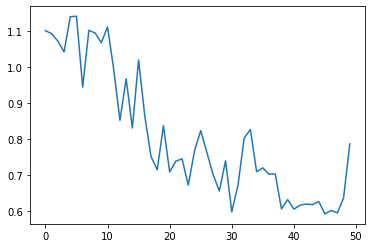

CPU times: user 38.8 s, sys: 2.25 s, total: 41.1 s
Wall time: 1min 17s


In [8]:
%%time
max_epochs = 50
loss_epochs_arr = []
loss_arr = []
for epoch in range(max_epochs):
  print(epoch)
  for i, data in enumerate(train, 0):
    inputs, labels = data
    inputs, labels = inputs.to(device), labels.to(device)

    opt.zero_grad()

    outputs = net(inputs)
    loss = loss_fn(outputs, labels)
    loss.backward()

    opt.step()
    loss_arr.append(loss.item())
      
  loss_epochs_arr.append(loss.item())
  print('Epochs: %d/%d, Train acc: %0.2f, Test acc: %0.2f' % (epoch, max_epochs, evaluation(train), evaluation(test)))

plt.plot(loss_epochs_arr)
plt.show()

In [ ]:
torch.save(net.state_dict(), '/content/model.pkl') # save the model parameters to the disk

In [11]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [10]:
    correct = 0 # initialize the number of correct predictions to zero
    total = 0 # initialize the total number of predictions to zero
    prediction = []
    labels_arr = [] 
    for i, data in enumerate(train, 0): # loop over all the batches in the test data
        inputs, labels = data 
        inputs, labels = inputs.to(device), labels.to(device)
        opt.zero_grad()
        outputs = net(inputs)
        total += labels.size(0) # increment the total number of predictions by the number of labels in the batch
        _, pred = torch.max(outputs.data, 1)
        # print(_, pred)
        correct += (pred == labels).sum() # compare the predicted labels with the actual labels, and increment the correct number of predictions by the number of matches
        pred = pred.numpy()
        labels = labels.numpy()
        prediction.extend(pred)
        labels_arr.extend(labels)
    print('Accuracy of the network on the 32 test images: %d %%' % (100 * correct / total)) # print the accuracy\ь


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Accuracy of the network on the 32 test images: 96 %


In [12]:
# Create Confusion MatrixTeX
cm = confusion_matrix(labels_arr, prediction)
print(cm)
print(classification_report(labels_arr, prediction))
print(accuracy_score(labels_arr, prediction))


[[27  0  3]
 [ 0 32  0]
 [ 0  0 30]]
              precision    recall  f1-score   support

           0       1.00      0.90      0.95        30
           1       1.00      1.00      1.00        32
           2       0.91      1.00      0.95        30

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92

0.967391304347826
